In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import imageio  
import random 
import time
from datetime import timedelta
from collections import defaultdict
import os

In [2]:
def cluster_asn(pixel, centroids):
    
    cluster_number = np.linalg.norm(centroids - pixel, axis=1)
    return np.argmin(cluster_number)


def centroids_adjust(pixel, assign_cluster, centroids):
 
    x, y = pixel.shape[:2]
    
    centroids_new = defaultdict(list)

    for i in range(x):
        for j in range(y):
            pixel[i, j]
            cluster = assign_cluster[i, j]
            centroids_new[cluster].append(pixel[i, j])

    centroids_fin = []

    for cluster in range(len(centroids)):
        cluster_pixels = centroids_new[cluster]
        
        if cluster_pixels:
            centroid_mean = np.mean(cluster_pixels, axis=0)
            centroid_rounded = np.around(centroid_mean).astype(np.uint8)
            centroids_fin.append(centroid_rounded.tolist())
        else:
            centroids_fin.append(centroids[cluster])
    
    return centroids_fin

def kmeans(pixel, k):
    
    time_start = time.time()
    
    x, y, z = pixel.shape
    
    assign_cluster = np.empty(shape=(x, y), dtype='object')

    np.random.seed(101)
    
    centroids = np.random.randint(0, 255, size=(k, 3)).tolist()

    iter_count = 1


    for i in range(x):
        for j in range(y):
            pixl = pixel[i, j]
            assign_cluster[i, j] = cluster_asn(pixl, centroids)
        

    centroids_new = centroids_adjust(pixel, assign_cluster, centroids)
    
    while centroids != centroids_new:
        iter_count += 1
        
        centroids = centroids_new

        for i in range(x):
            for j in range(y):
                pixl = pixel[i, j]
                assign_cluster[i, j] = cluster_asn(pixl, centroids)
 
        centroids_new = centroids_adjust(pixel, assign_cluster, centroids)
        

    time_end = time.time()  
    total_time = timedelta(seconds=time_end - time_start).seconds
    
   
    image = np.empty(shape=(x, y, z), dtype='object')
    for row in range(x):
        for col in range(y):
            pixl = assign_cluster[row, col]
            image[row, col] = np.array(centroids_new[pixl])
    

    labels = assign_cluster + 1
    image_final = np.reshape(image, (pixel.shape))
    
    
    wcss = 0  

    for row in range(x):
        for col in range(y):
            cluster = assign_cluster[row, col]
            image_final[row, col] = np.array(centroids_new[cluster])
            wcss += np.linalg.norm(pixel[row, col] - centroids_new[cluster])**2
    
    return labels, centroids_new, image_final, iter_count, total_time, wcss



coastal-abstract, k = 2, Iterations = 9, Time = 29 seconds
flowers, k = 2, Iterations = 10, Time = 29 seconds
football, k = 2, Iterations = 17, Time = 163 seconds
coastal-abstract, k = 4, Iterations = 24, Time = 84 seconds
flowers, k = 4, Iterations = 13, Time = 50 seconds
football, k = 4, Iterations = 14, Time = 155 seconds
coastal-abstract, k = 8, Iterations = 29, Time = 130 seconds
flowers, k = 8, Iterations = 27, Time = 98 seconds
football, k = 8, Iterations = 29, Time = 355 seconds
coastal-abstract, k = 16, Iterations = 35, Time = 165 seconds
flowers, k = 16, Iterations = 42, Time = 174 seconds
football, k = 16, Iterations = 43, Time = 455 seconds
coastal-abstract, k = 32, Iterations = 43, Time = 175 seconds
flowers, k = 32, Iterations = 45, Time = 146 seconds
football, k = 32, Iterations = 50, Time = 568 seconds


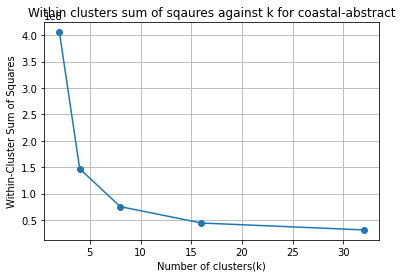

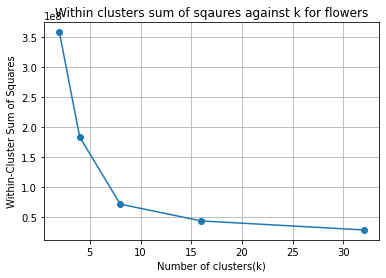

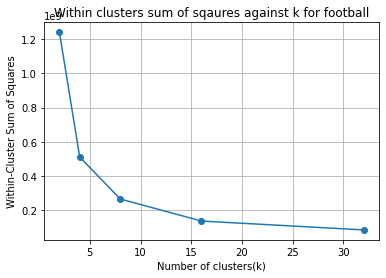

In [3]:
k_values = [2,4,8,16,32]
image_paths = ['coastal-abstract.jpeg', 'flowers.bmp', 'football.bmp']


wcss_dict = {img: [] for img in image_paths}

output_dir = 'kmeans_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for k in k_values:
    for img in image_paths:
        image = imageio.imread(img)
        
        
        label, cluster_centers, compressed_image, iterations, run_time, wcss = kmeans(image, k)
        
        wcss_dict[img].append((k, wcss))
    
        img_name = img.split('/')[-1].split('.')[0]
        output_path = f'kmeans_output/{img_name}_{k}.png'
        
        plt.imsave(output_path, compressed_image.astype(np.uint8))
        print(f'{img_name}, k = {k}, Iterations = {iterations}, Time = {run_time} seconds')
        

for img in image_paths:
    img_name = img.split('/')[-1].split('.')[0]
    k_values, wcss_values = zip(*wcss_dict[img])
    
    plt.figure()
    plt.plot(k_values, wcss_values, marker='o')
    plt.title(f'Within clusters sum of sqaures against k for {img_name}')
    plt.xlabel('Number of clusters(k)')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.grid(True)
    
    plt.savefig(f'kmeans_output/{img_name}_wcss_plot.png')
    plt.show()
